In [19]:
import numpy as np
from numpy.polynomial import Polynomial
from numpy.polynomial.polynomial import polyval
from Turbinen_class_file import Francis_turbine_class
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#importing pressure conversion function
import sys
import os
current = os.path.dirname(os.path.realpath('messy.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent)
from functions.pressure_conversion import pressure_conversion

%matplotlib widget


In [20]:
# create turbine object
T1 = Francis_turbine_class()
csv = T1.raw_csv

T1.extract_csv()
ps_raw  = T1.raw_ps_vec
n_ps_raw  = np.size(T1.raw_ps_vec)
LAs_raw = T1.raw_LA_vec
n_LAs_raw = np.size(T1.raw_LA_vec)
Qs_raw  = T1.raw_Qs_mat

Q_fun = T1.get_Q_fun()

In [21]:
# interpolate Qs for more LAs

n_LA_int = 2001

LA_int = np.linspace(0,1,n_LA_int,endpoint=True)

Q_int = np.reshape(Q_fun(ps_raw,LA_int),[n_LA_int,n_ps_raw])

In [22]:
# fit a polynomial to the data from Qs_Raw
    # receive a coefficient matrix 
poly_deg = 3
fit_coeff_mat = np.empty([n_LA_int,poly_deg+1])
fit_weights = np.ones_like(ps_raw)
fit_weights[0] = 20 # put extra weight on the p=0 => Q=0 data

for i in range(n_LA_int):
    x = ps_raw
    y = Q_int[i,:]
    fit_coeff_mat[i,:] = np.polynomial.polynomial.Polynomial.fit(x,y,poly_deg,w=fit_weights).convert().coef


In [23]:
p_ext_min = 0
p_ext_max = 2.5*np.max(ps_raw)
n_p_ext = 200

p_ext = np.linspace(p_ext_min,p_ext_max,n_p_ext)

Qs_ext = np.zeros([n_LA_int,n_p_ext])

for i in range(n_LA_int):
    Qs_ext[i,:] = polyval(p_ext,fit_coeff_mat[i,:])



Text(0.5, 1.0, 'LA = 0.05')

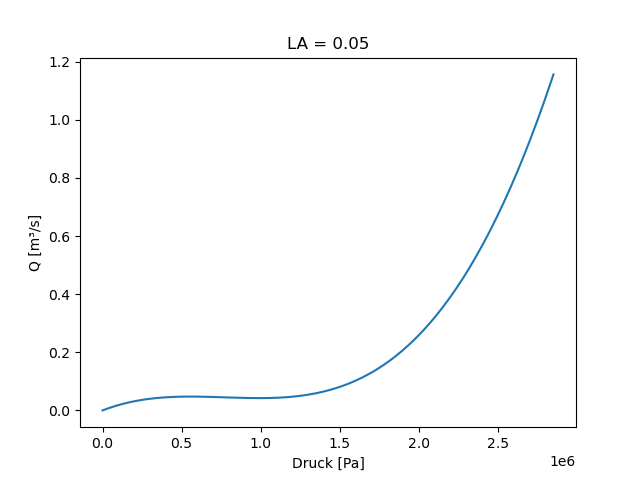

In [24]:
LA_test = 0.05
LA_index = int(np.argwhere(LA_int == LA_test))

fig = plt.figure()
plt.plot(p_ext,Qs_ext[LA_index,:])
plt.xlabel('Druck [Pa]')
plt.ylabel('Q [m³/s]')
plt.title('LA = '+ str(LA_test))


In [25]:
def Q_formel(p,LA):
    x= LA
    y = p*1e-5
    a = -215.9324
    b = +332.86766
    c = -2.40164
    d = +67.45335
    e = -6.92688
    f = +0.23341
    g = -0.0225
    h = +0.0499
    i = -0.09458
    j = +0.00324
    k = +1.
    return (a+b*x+c*x**2+d*y+e*y**2+f*y**3)/(1+g*x+h*x**2+i*y+j*y**2)*k/1000

Text(0.5, 1.0, 'P = 1145728.6432160805 [Pa]')

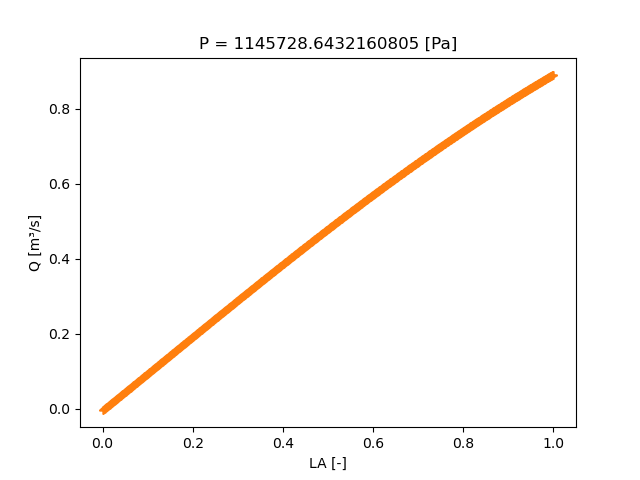

In [26]:
p_test,_ = pressure_conversion(11.4,'bar','Pa')
p_index = int(np.argmin(abs(p_ext-p_test)))
p_test2 = p_ext[p_index]

fig = plt.figure()
plt.plot(LA_int,Qs_ext[:,p_index])
plt.plot(LA_int,Q_formel(p_test2,LA_int),'+')
plt.xlabel('LA [-]')
plt.ylabel('Q [m³/s]')
plt.title('P = '+ str(p_test2) + ' [Pa]')

Text(0.5, 0, 'Q [m³/s]')

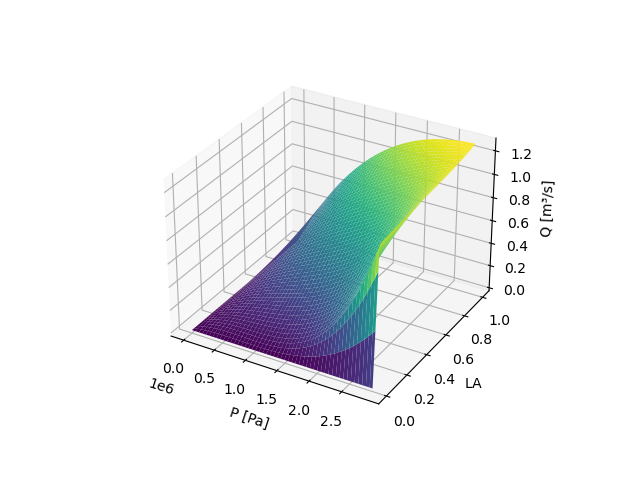

In [27]:
XX,YY = np.meshgrid(p_ext,LA_int)

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.plot_surface(XX, YY, Qs_ext,cmap='viridis', edgecolor='none')
ax1.set_xlabel('P [Pa]')
ax1.set_ylabel('LA')
ax1.set_zlabel('Q [m³/s]')


In [29]:
a = T1.raw_csv